In [12]:
import pandas as pd

avengers = pd.read_csv("avengers1.csv")
print(avengers.head())

                                                 URL  \
0      http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1  http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2  http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3  http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4   http://marvel.wikia.com/Thor_Odinson_(Earth-616)   

                    Name/Alias  Appearances Current?  Gender  \
0    Henry Jonathan "Hank" Pym         1269      YES    MALE   
1               Janet van Dyne         1165      YES  FEMALE   
2  Anthony Edward "Tony" Stark         3068      YES    MALE   
3          Robert Bruce Banner         2089      YES    MALE   
4                 Thor Odinson         2402      YES    MALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   
2                 NaN                 

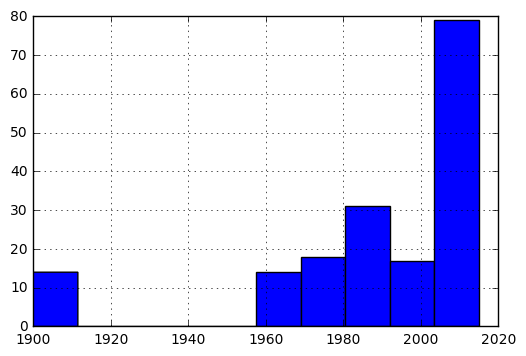

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
avengers["Year"].hist()

In [69]:
#Removing invalid data
true_avengers_bool = avengers["Year"]>1960
true_avengers = avengers[true_avengers_bool]
#Creating new column, consolidating deaths
death_field = ["Death1","Death2","Death3", "Death4","Death5"]

def deaths_bol_convert(series):
    r = true_avengers[series] == "YES"
    return r
deaths = pd.DataFrame()

for d in death_field:
    deaths[d] = deaths_bol_convert(d)

def consolidate_death(row):
    tot_death = 0
    for i in death_field:
        if row[i] == True:
            tot_death += 1;
    return tot_death
k= deaths.apply(consolidate_death,axis = 1)
true_avengers['Deaths'] = k

print(true_avengers["Deaths"].value_counts())

0    91
1    52
2    14
5     1
3     1
Name: Deaths, dtype: int64


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [113]:
true_year_since = 2015 - true_avengers["Year"]
true_year_since_bool = true_avengers["Years since joining"] == true_year_since
joined_accuracy_count = len(true_avengers[true_year_since_bool])
print(joined_accuracy_count)

159
